## Hypothesis Testing with A/B Testing

In [9]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [10]:
#Load the dataset
df = pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [11]:
#Check for duplicates in the user id column
df.duplicated(subset = ['user id']).sum()

0

In [12]:
#Drop the Unnamed column that is not needed
df.drop(['Unnamed: 0'], inplace = True, axis = 1)

In [13]:
#Check the columns of the dataframe
df.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [16]:
#Check if the categorical variables have appropriate number of levels
df_categories = df[['test group', 'converted', 'most ads day', 'most ads hour']]
#Check the number of unique values in each categorical column
df_categories.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [18]:
#Display the unique values in each categorical column
for i in df_categories.columns:
    print(i.upper(), ":", df_categories[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


## Univariate Analysis

We are going to pick each of the categorical variables each at a time and visualize it. 

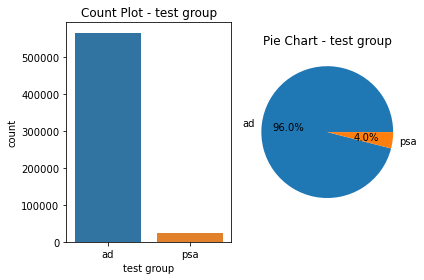

In [19]:
variable = 'test group'
plt.figure(figsize=(6, 4))

# count plot
plt.subplot(1,2, 1)
sns.countplot(x=variable, data=df_categories)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2, 2)
counts = df_categories[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title(f'Pie Chart - {variable}')

#aAdjust layout
plt.tight_layout()

#Display the plots
plt.show()